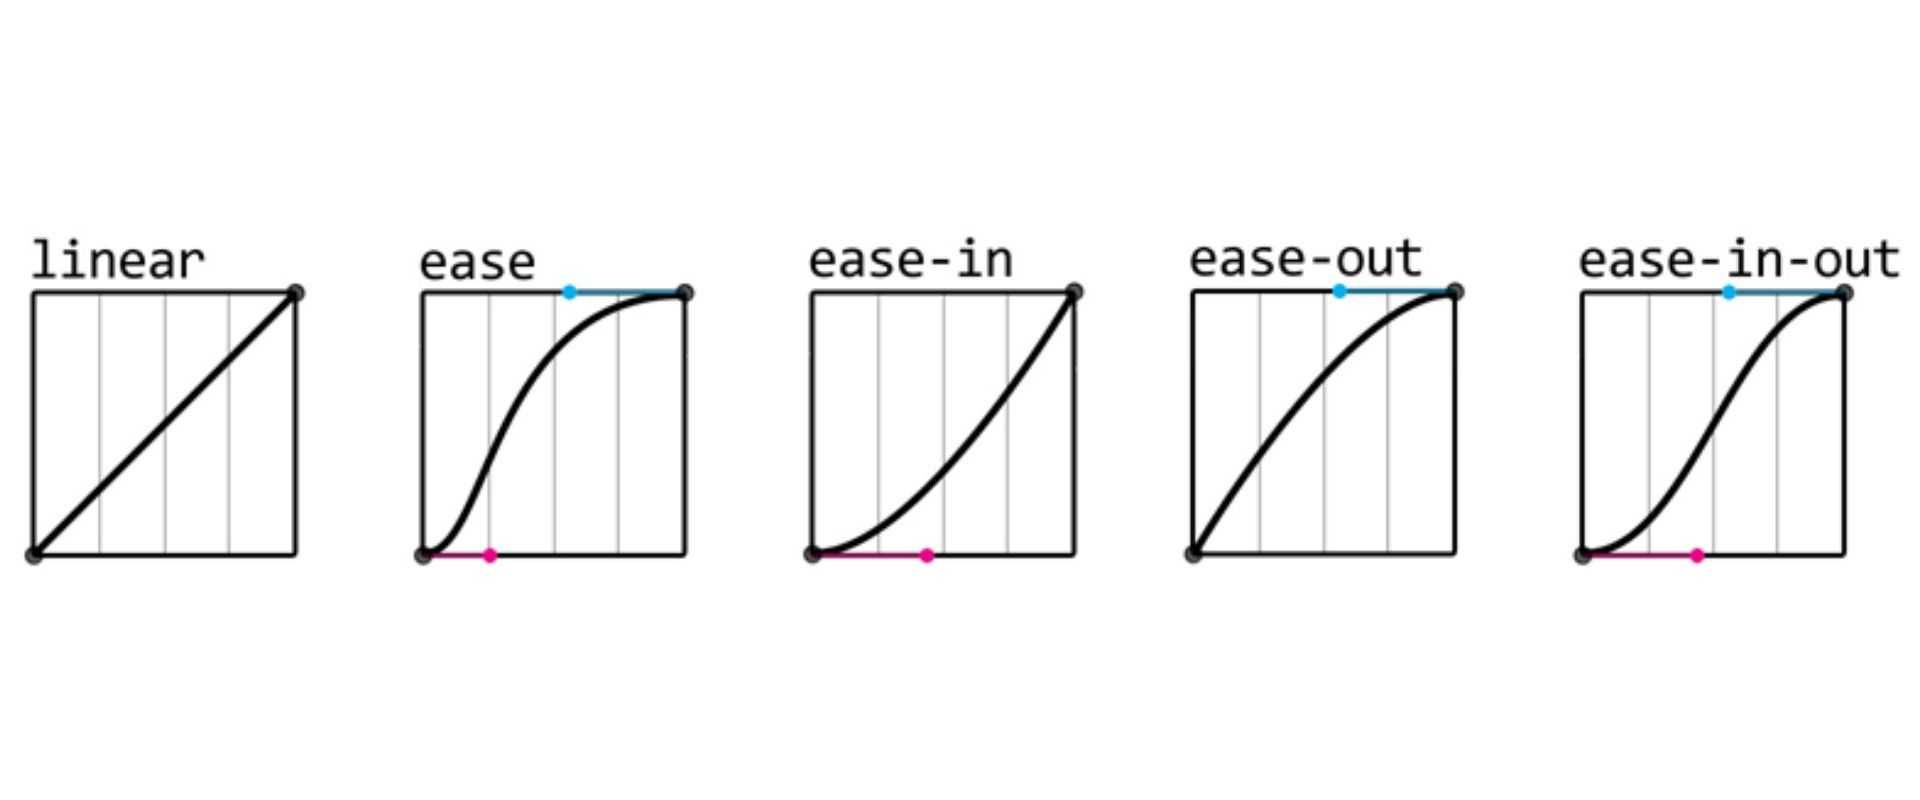

In [16]:
import numpy as np
import pandas as pd
import math
import ace_tools_open as tools

pd.set_option('display.max_columns', None)

In [34]:
def generate_angle_positions(mode, total_frames, start_angle, end_angle):
    # Update total frames to 30 for the new calculation
    # total_frames = total_frames
    frames = np.linspace(0, 1, total_frames)
    
    # Parameters for the start and end angles
    # start_angle = start_angle
    # end_angle = end_angle
    total_angle_change = start_angle - end_angle

    # Linear transition
    if mode == 'Linear':
        angle_positions = start_angle - (total_angle_change * frames)
        
    # Ease (like an S-curve transition)
    elif mode == 'Ease':
        angle_positions = start_angle - (total_angle_change * (3 * frames**2 - 2 * frames**3))

    # Ease-In transition (slow start, fast end)
    elif mode == 'Ease in':
        angle_positions = start_angle - (total_angle_change * (frames ** 3))

    # Ease-Out transition (fast start, slow end)
    elif mode == 'Ease out':
        angle_positions = start_angle - (total_angle_change * (1 - (1 - frames) ** 2))

    # Ease-In-Out transition (slow start, fast middle, slow end)
    elif mode == 'Ease in out':
        angle_positions = start_angle - (total_angle_change * ((frames**3) * (frames * (6 * frames - 15) + 10)))
        
    else:
        raise ValueError("Invalid mode selected. Choose from 'Linear', 'Ease', 'Ease in', 'Ease out', 'Ease in out'.")

    # Calculate the angle increment per frame
    frame_increments = np.diff(angle_positions, prepend=start_angle).round(2)
    
    # Convert the results to a DataFrame for display
    result_df = pd.DataFrame({
        'Frame': range(1, total_frames + 1),
        'Angle Position (degrees)': angle_positions.round(2),
        'Angle Increment (degrees)': frame_increments
    })
    
    # Display the DataFrame to the user
    tools.display_dataframe_to_user(name=f"Frame Positions with {mode} for {total_frames} Frames", dataframe=result_df)

### A1

### Shoulder

In [35]:
generate_angle_positions(mode='Ease out', total_frames=24, start_angle=-10, end_angle=10)

Frame Positions with Ease out for 24 Frames


In [36]:
generate_angle_positions(mode='Ease out', total_frames=24, start_angle=0, end_angle=15)

Frame Positions with Ease out for 24 Frames


### Elbow

In [37]:
generate_angle_positions(mode='Ease out', total_frames=24, start_angle=100, end_angle=130)

Frame Positions with Ease out for 24 Frames


### A2

In [27]:
generate_angle_positions(mode='Ease out', total_frames=16, start_angle=10, end_angle=-10)

Frame Positions with Ease out for 16 Frames


In [28]:
generate_angle_positions(mode='Ease out', total_frames=16, start_angle=0, end_angle=-20)

Frame Positions with Ease out for 16 Frames


In [29]:
generate_angle_positions(mode='Ease out', total_frames=16, start_angle=130, end_angle=90)

Frame Positions with Ease out for 16 Frames
